# <center> **Minor Project - Stock Price Prediction** </center>

***
## Introduction :

Utilize Machine Learning techniques to estimate the stock value using the Long Short-term Memory(LSTM) Networks.

![Stock-Market.jpg](attachment:Stock-Market.jpg)

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
# Importing data
df = pd.read_excel('2021-2022_data.xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
1,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
2,2021-01-06,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
3,2021-01-07,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
4,2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900


In [4]:
# Check shape of the dataset
df.shape

(276, 7)

In [5]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       276 non-null    datetime64[ns]
 1   Open       276 non-null    float64       
 2   High       276 non-null    float64       
 3   Low        276 non-null    float64       
 4   Close      276 non-null    float64       
 5   Adj Close  276 non-null    float64       
 6   Volume     276 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.2 KB


In [6]:
# Description of the dataset
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,276,276.000000,276.000000,276.000000,276.000000,276.000000,2.760000e+02
mean,2021-07-21 00:36:31.304347904,551.819528,558.492933,544.251957,551.196774,551.196774,4.647431e+06
min,2021-01-04 00:00:00,378.269989,382.660004,351.459991,359.700012,359.700012,1.287200e+06
25%,2021-04-13 18:00:00,511.942497,516.237503,504.562493,510.374992,510.374992,2.703775e+06
50%,2021-07-21 12:00:00,540.154999,548.200012,531.875000,539.934998,539.934998,3.357150e+06
75%,2021-10-27 06:00:00,595.290008,602.424988,585.382507,593.380005,593.380005,4.452075e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,62.434781,62.687306,62.256404,62.287856,62.287856,5.132586e+06


In [7]:
# Sum of null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Looking for the unique values
df.nunique()

Date         276
Open         274
High         273
Low          275
Close        273
Adj Close    273
Volume       276
dtype: int64

# Exploratory Data Analysis

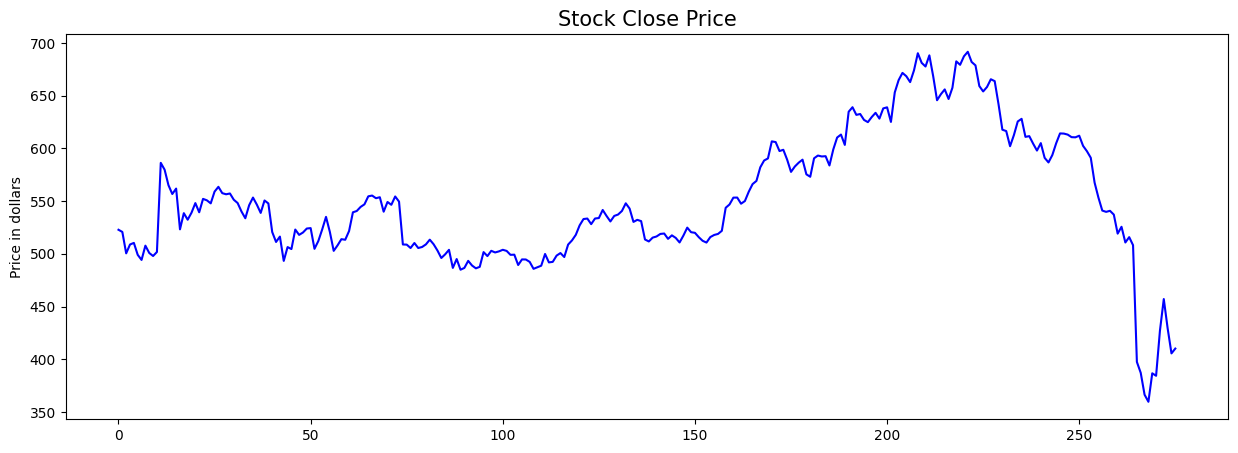

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'], color="blue")
plt.title('Stock Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [10]:
# Splitting the data into training and testing sets

df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])             #70% used as a training data
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])   #30% used as a testing data

print(df_train.shape)
print(df_test.shape)

(193, 1)
(83, 1)


In [11]:
# Checking the output of training & testing sets
df_train.head()

,Close
0,522.859985
1,520.799988
2,500.489990
3,508.890015
4,510.399994


In [12]:
df_test.head()

,Close
193,632.659973
194,627.039978
195,624.940002
196,629.760010
197,633.799988


In [13]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:

df_train_array = scaler.fit_transform(df_train)
df_train_array

array([[0.24578239],
       [0.2324162 ],
       [0.10063575],
       [0.15513891],
       [0.16493634],
       [0.09161691],
       [0.06014788],
       [0.14800158],
       [0.10303645],
       [0.08434988],
       [0.10894097],
       [0.6576696 ],
       [0.61549466],
       [0.52030879],
       [0.46587097],
       [0.49928627],
       [0.24850783],
       [0.34791057],
       [0.30761754],
       [0.3507655 ],
       [0.40994015],
       [0.35342599],
       [0.43589396],
       [0.42700481],
       [0.40838299],
       [0.48072939],
       [0.51005732],
       [0.47112661],
       [0.46418392],
       [0.4691152 ],
       [0.43057378],
       [0.41032945],
       [0.35842183],
       [0.31663658],
       [0.3968987 ],
       [0.44400453],
       [0.40046727],
       [0.34953268],
       [0.42603179],
       [0.4077343 ],
       [0.23176751],
       [0.17071116],
       [0.2038023 ],
       [0.05417842],
       [0.13924212],
       [0.12691411],
       [0.24708017],
       [0.214

In [15]:
# Chekcking the shape of scaled array
df_train_array.shape

(193, 1)

In [16]:
# Preparing the training data

X_train = []
y_train = []

for i in range(100,df_train_array.shape[0]):
    X_train.append(df_train_array[i-100:i])
    y_train.append(df_train_array[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [17]:
# Building model of 4 LSTM network followed by Dropout layout

model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
# Checking the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
# Compiling & fitting the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = model.fit(X_train,y_train, epochs = 50, batch_size = 32, verbose = 2 )

Epoch 1/50
3/3 - 7s - loss: 0.1929 - 7s/epoch - 2s/step
Epoch 2/50
3/3 - 1s - loss: 0.1532 - 739ms/epoch - 246ms/step
Epoch 3/50
3/3 - 1s - loss: 0.0880 - 778ms/epoch - 259ms/step
Epoch 4/50
3/3 - 1s - loss: 0.0736 - 757ms/epoch - 252ms/step
Epoch 5/50
3/3 - 1s - loss: 0.0504 - 781ms/epoch - 260ms/step
Epoch 6/50
3/3 - 1s - loss: 0.0559 - 768ms/epoch - 256ms/step
Epoch 7/50
3/3 - 1s - loss: 0.0590 - 773ms/epoch - 258ms/step
Epoch 8/50
3/3 - 1s - loss: 0.0450 - 761ms/epoch - 254ms/step
Epoch 9/50
3/3 - 1s - loss: 0.0384 - 751ms/epoch - 250ms/step
Epoch 10/50
3/3 - 1s - loss: 0.0403 - 1s/epoch - 342ms/step
Epoch 11/50
3/3 - 1s - loss: 0.0379 - 1s/epoch - 466ms/step
Epoch 12/50
3/3 - 1s - loss: 0.0342 - 1s/epoch - 463ms/step
Epoch 13/50
3/3 - 1s - loss: 0.0311 - 1s/epoch - 345ms/step
Epoch 14/50
3/3 - 1s - loss: 0.0265 - 760ms/epoch - 253ms/step
Epoch 15/50
3/3 - 1s - loss: 0.0270 - 786ms/epoch - 262ms/step
Epoch 16/50
3/3 - 1s - loss: 0.0247 - 760ms/epoch - 253ms/step
Epoch 17/50
3/3 - 1

In [20]:
df_test.head()

,Close
193,632.659973
194,627.039978
195,624.940002
196,629.760010
197,633.799988


#### For prediction, we need testing data and if we look the test data from above table. We can say that we need previous days data for  prediction. Hence, for prediction append the 'df_train.tail() to df_test.head()' as mentioned below:

In [21]:
df_train.tail()

,Close
188,613.150024
189,603.349976
190,634.809998
191,639.099976
192,631.849976


In [22]:
# Append testing & training data
past_100_days = df_train.tail(100)

In [23]:
import pandas as pd

# Assuming past_100_days and df_test are your DataFrames
final_df = pd.concat([past_100_days, df_test], ignore_index=True)


In [24]:
# Scaling the data

input_data = scaler.fit_transform(final_df)
input_data

array([[0.38127652],
       [0.38555379],
       [0.42763338],
       [0.4162475 ],
       [0.43133825],
       [0.42663932],
       [0.42971167],
       [0.43422988],
       [0.43106717],
       [0.41983186],
       [0.42031381],
       [0.39076474],
       [0.40675919],
       [0.40651826],
       [0.39968073],
       [0.37986081],
       [0.3842585 ],
       [0.38877671],
       [0.42227178],
       [0.39820472],
       [0.39974094],
       [0.4176029 ],
       [0.42492238],
       [0.41356665],
       [0.44917015],
       [0.46097769],
       [0.47700229],
       [0.50414169],
       [0.52209411],
       [0.52350972],
       [0.50757557],
       [0.52363014],
       [0.52495549],
       [0.54802858],
       [0.53091965],
       [0.51525649],
       [0.53097977],
       [0.53498597],
       [0.54513686],
       [0.56703517],
       [0.55197447],
       [0.51390099],
       [0.519835  ],
       [0.51612995],
       [0.46365854],
       [0.45805591],
       [0.46902005],
       [0.472

In [25]:
# Checking shape of the input_data
input_data.shape

(183, 1)

In [26]:
# Preparing the testing data
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

X_test,y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(83, 100, 1)
(83,)


In [27]:
# Making Predictions

y_pred = model.predict(X_test)
print(y_pred.shape)

3/3 [==============================] - 1s 78ms/step
(83, 1)


In [28]:
# Checking y_test
y_test

array([0.82219335, 0.80526514, 0.79893972, 0.81345826, 0.82562723,
       0.80903031, 0.8381878 , 0.84129039, 0.79954219, 0.8839422 ,
       0.91894342, 0.93966677, 0.93020879, 0.9133407 , 0.94686583,
       0.99584324, 0.96831224, 0.95792032, 0.98975866, 0.92984735,
       0.86153188, 0.87879156, 0.8924666 , 0.86511633, 0.89725598,
       0.97264973, 0.96277001, 0.98707799, 1.        , 0.97087267,
       0.96117349, 0.90213563, 0.8866532 , 0.89939448, 0.92153382,
       0.916112  , 0.85002566, 0.77734274, 0.77342681, 0.73023284,
       0.76204102, 0.80086754, 0.80839788, 0.7569505 , 0.75893843,
       0.73755232, 0.71776254, 0.73899808, 0.69688844, 0.68384582,
       0.70496095, 0.73863664, 0.7667098 , 0.76625809, 0.76333622,
       0.75607704, 0.75556485, 0.76023381, 0.73116659, 0.71589503,
       0.69715961, 0.62598275, 0.58311989, 0.54628149, 0.54263673,
       0.54561891, 0.53471479, 0.48043617, 0.49998492, 0.45513413,
       0.47037555, 0.44745321, 0.11385882, 0.08268316, 0.02024

In [29]:
# Checking y_pred
y_pred

array([[0.809435  ],
       [0.81973934],
       [0.83091646],
       [0.84251225],
       [0.8542021 ],
       [0.8658024 ],
       [0.8770602 ],
       [0.88796866],
       [0.8985577 ],
       [0.90855855],
       [0.9183092 ],
       [0.92831266],
       [0.9390477 ],
       [0.9507153 ],
       [0.9632058 ],
       [0.9765048 ],
       [0.9908291 ],
       [1.0060704 ],
       [1.0219383 ],
       [1.0383122 ],
       [1.0546176 ],
       [1.069845  ],
       [1.083337  ],
       [1.094819  ],
       [1.1040456 ],
       [1.1112328 ],
       [1.1172426 ],
       [1.1227463 ],
       [1.1283914 ],
       [1.1346784 ],
       [1.1416626 ],
       [1.1491779 ],
       [1.1565654 ],
       [1.1631457 ],
       [1.1685417 ],
       [1.1727469 ],
       [1.175837  ],
       [1.1774656 ],
       [1.1768909 ],
       [1.1736813 ],
       [1.1674387 ],
       [1.1583531 ],
       [1.1471236 ],
       [1.1345589 ],
       [1.1210432 ],
       [1.1069262 ],
       [1.092375  ],
       [1.077

#### From above y_test & y_pred, we can't recognize how they are matching. hence, for that we need to scale the data.

In [30]:
# Scaling the data
scaler.scale_

array([0.00301214])

In [31]:
scale_factor = 1/0.00301214
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

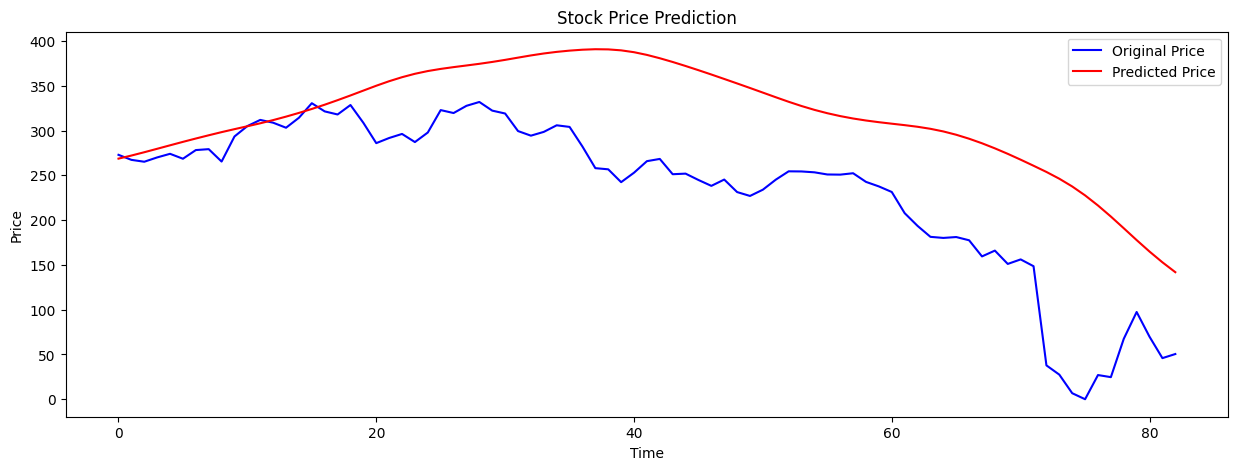

In [32]:
# Plotting graph for the result
plt.figure(figsize = (15,5))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Conclusion :
Above graph shows the relation between Actual price(Blue Line) and Predicted price(Red Line) of stock for the mentioned dataset.